# Рубежный контроль №1

Емельянова Т.И. ИУ5-24М

Вариант: 2

Номер первой задачи: 2

Номер второй задачи: 22

Задача для группы: для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

## Подготовка данных

Импортируем необходимые библиотеки

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import MaxAbsScaler

Установим датасет: данные о различных компьютерах (источник: https://www.kaggle.com/datasets/owm4096/laptop-prices/data)

In [33]:
dataset = pd.read_csv('laptop_prices.csv')

dataset.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


Общая информация о датасете:

In [35]:
dataset.shape

(1275, 23)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [36]:
dataset.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


## Задача №1 (2)

Условие: для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "target (mean) encoding".

Выполним эту задачу для признаков Company и Price_euros. Будем использовать TargetEncoder из библиотеки sklearn.



In [15]:
dataset[['Company', 'Price_euros']].head(5)

,Company,Price_euros
0,Apple,1339.69
1,Apple,898.94
2,HP,575.00
3,Apple,2537.45
4,Apple,1803.60


In [16]:
dataset['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [19]:
encoder = TargetEncoder(smooth="auto")
dataset['Encoding'] = encoder.fit_transform(dataset[['Company']], dataset[['Price_euros']])
dataset[['Company', 'Price_euros', 'Encoding']].head(10)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Company,Price_euros,Encoding
0,Apple,1339.69,1550.240762
1,Apple,898.94,1633.133989
2,HP,575.00,1064.427428
3,Apple,2537.45,1373.945282
4,Apple,1803.60,1550.240762
5,Acer,400.00,647.762745
6,Apple,2139.97,1587.996288
7,Apple,1158.70,1633.133989
8,Asus,1495.00,1142.825730
9,Acer,770.00,648.254646


## Задача №2 (22)

Условие: для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по максимальному значению.

Сделаем эту задачу для столбца Price_euros. Будем использовать MaxAbsScaler из sklearn.

In [22]:
transformer = MaxAbsScaler().fit(dataset[['Price_euros']])

dataset['Scaled_price'] = transformer.transform(dataset[['Price_euros']])

dataset[['Price_euros', 'Scaled_price']].head(10)

,Price_euros,Scaled_price
0,1339.69,0.219657
1,898.94,0.147391
2,575.00,0.094278
3,2537.45,0.416044
4,1803.60,0.295721
5,400.00,0.065585
6,2139.97,0.350872
7,1158.70,0.189982
8,1495.00,0.245122
9,770.00,0.126250


Проверим значение Scaled_price для максимального значения цены:

In [24]:
max_price_index = dataset['Price_euros'].idxmax()

dataset.loc[max_price_index, ['Price_euros', 'Scaled_price']]

,196
Price_euros,6099.0
Scaled_price,1.0


Значение при минимальной цене:

In [25]:
min_price_index = dataset['Price_euros'].idxmin()

dataset.loc[min_price_index, ['Price_euros', 'Scaled_price']]

,1215
Price_euros,174.0
Scaled_price,0.028529


## Задача группы (диаграмма)

Условие: для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

Построим диаграмму для колонок Company и CPU_company

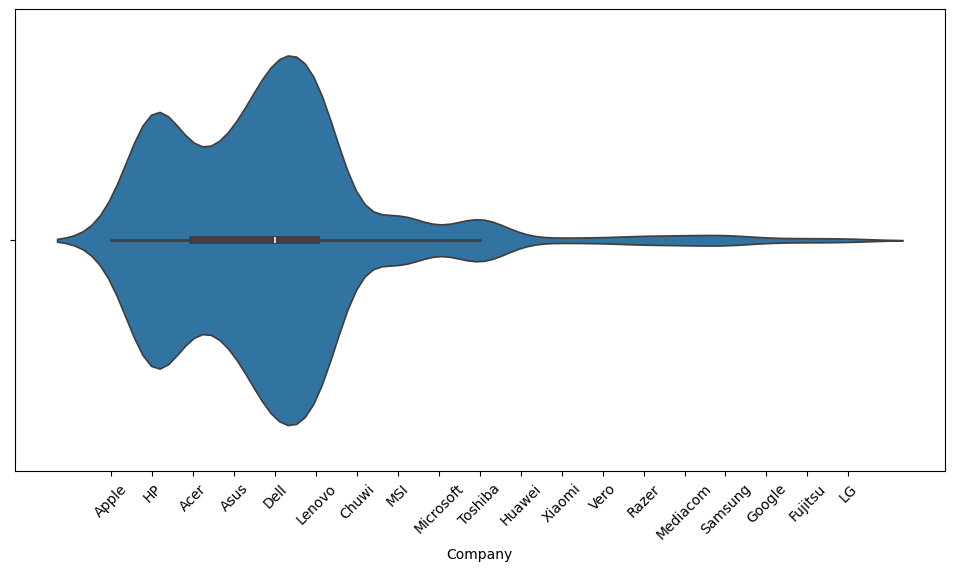

In [31]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='Company', data=dataset)

plt.xlabel('Company')
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='CPU_company'>

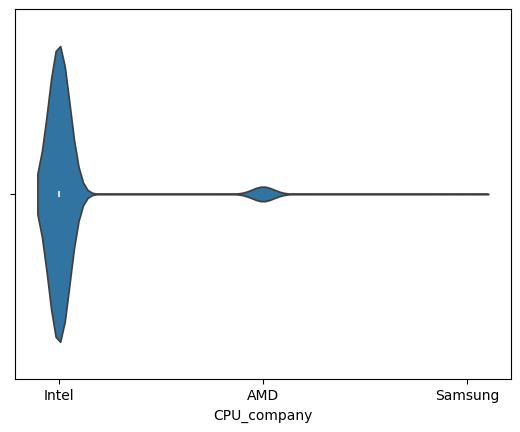

In [28]:
sns.violinplot(x=dataset['CPU_company'])